# Noções básicas de classificação de imagem

## Treine sua primeira rede neural: classificação básica

Treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Esta é uma visão geral de um programa do TensorFlow com detalhes

Usa ```tf.keras```, uma API de alto nível para construir e treinar modelos no TensorFlow

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


### Importe a base de dados Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

Carregando a base de dados que retorna 4 NumPy arrays:

 * Os arrays `train_images` e `train_labels` são o conjunto de treinamento.
 * O modelo é testado com o conjunto de teste, os arrays `test_images` e `test_labels`

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

As imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 e 255. As *labels* (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com classe de roupa que cada imagem representa:

Label | Classe
------|--------
0     |Camiseta/Top (T-Shirt/Top)
1     |Calça (Trouser)
2     |Suéter (Pullover)
3     |Vestidos (Dress)
4     |Casaco (coat)
5     |Sandálias (Sandal)
6     |Camisas (Shirt)
7     |Tênis (Sneaker)
8     |Bolsa (Bag)
9     |Botas (Ankle boot)

Cada imagem é mapeada com uma só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
               'Ankle boot']

### Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representante em 28x28

In [5]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [6]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28x28 pixels:

In [8]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens:

In [9]:
len(test_labels)

10000

### Pré-processamento dos dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de dados de treinamento, voce verá que os valores dos pixels estão entre 0 e 255:

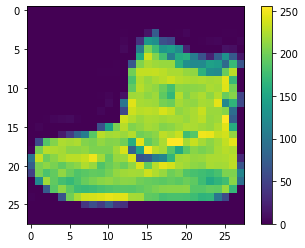

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo entre 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo:

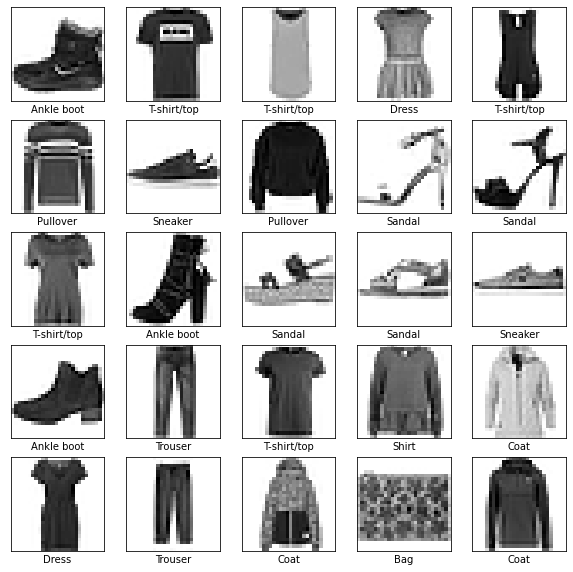

In [12]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo

#### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede.

Muito do *deep learning* consiste encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira cada da rede, `tf.keras.layers.Dense`. Essa são camadas neurais densas, ou completamente conectadas. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camada é uma *softmax* de 10 nós que retorna uma array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

#### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão no passo de *compilação*.

* Função *Loss* - Essa mede quão preciso é o modelo durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa.
* *Optimizer* - Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
* *Metrics* - usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [14]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste - nesse exemplo, o array `test_images`. Verificados se as previsões combinaram com as *labels* do array `test_array`.

Para começar a treinar, chame o método `model.fit` - assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2674 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.9089 (ou 90,89 %) com o conjunto de treinamento.

### Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'Teste de acurácia: {test_acc}')

313/313 - 0s - loss: 0.3521 - accuracy: 0.8760
Teste de acurácia: 0.8759999871253967


Acabou que a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é o modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas.

### Faça predições

Com o modelo treinado, o usaremos para algumas imagens.

In [17]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição

In [18]:
predictions[0]

array([1.2852291e-07, 7.2262254e-13, 3.1264935e-09, 1.9603028e-11,
       1.7067779e-09, 4.0844482e-04, 1.2301250e-07, 2.4609035e-02,
       6.6277528e-10, 9.7498226e-01], dtype=float32)

A predição é uma array de 10 números. Eles representam uma confiança do modelo que a imagem corresponde a cada uma das classes. Podemos ver cada *label* tem um maior valor de confiança

In [19]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que essa imagem é uma bota (ankle boot) ou `class names [9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [20]:
test_labels[0]

9

Podemos mostrar graficamente como se parece um conjunto de previsão de 10 classes

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [28]:
def plot_value_array(i, predictions_array, true_label):
        predictions_array, true_label = predictions_array[i], true_label[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)
        
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

Vamos olhar a previsão da imagem na posição 0, do array de predição

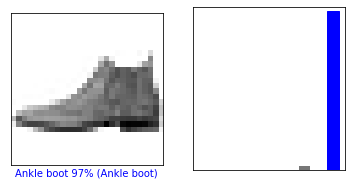

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

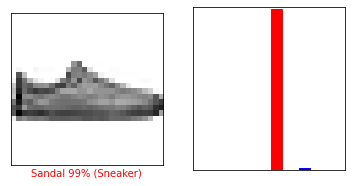

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

Vamos plotar algumas imagens da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

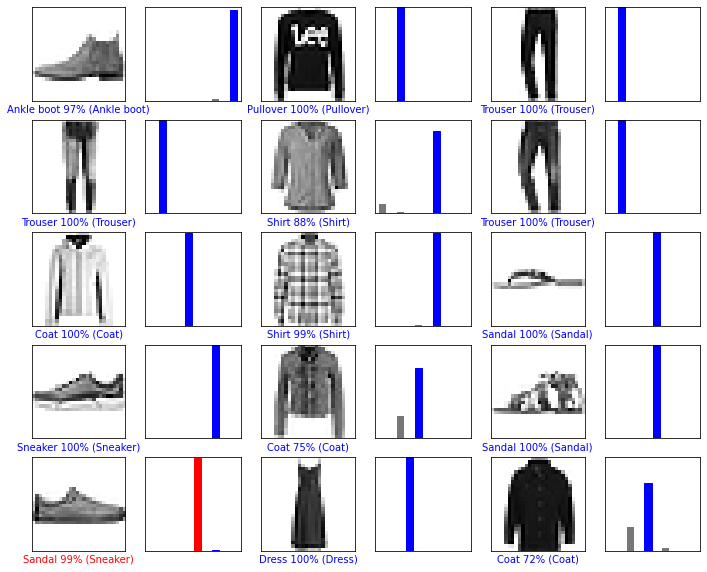

In [32]:
# plota o primeiro X test_images, e as labels preditas, e as labels verdeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Finalmente, use o modelo treinado para fazer a predição de uma única imagem

In [33]:
# Pegue uma imagem do conjunto de dados de teste
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em uma *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [34]:
# Adiciona uma imagem em uma batch que possui só um membro
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2852256e-07 7.2262254e-13 3.1264935e-09 1.9603064e-11 1.7067747e-09
  4.0844464e-04 1.2301237e-07 2.4609042e-02 6.6277528e-10 9.7498226e-01]]


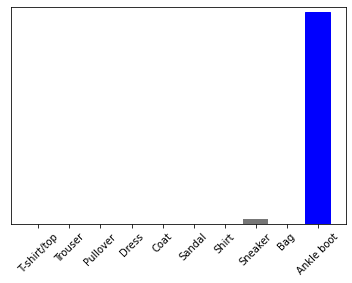

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas - uma lista para cada imagem de uma *batch* de dados. Pegue a predição de nossa única imagem no *batch*:

In [37]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9

In [38]:
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.